# Generating Synthetic Data for 2 Years
This generates data for 2 years 

In [460]:
%matplotlib inline

import datetime
import random
import math
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(color_codes=True)

#random.seed(18750)

# max and min sleep duration in minutes with extra 90mins for weekends
min_sleep = 450 #minutes
max_sleep = 510
min_extra = 30
max_extra = 60

#dformat = '%Y-%m-%d' 

def daily(x, start=21):
    sleep = random.randint(min_sleep, max_sleep)
    start = random.randint(22, 23)
    rand_min = random.randint(0, 59)
    st_hour = datetime.time(start, rand_min)
    start_time = datetime.datetime.combine(x, st_hour)
    #weekday = x.dayofweek
    #is_weekend = 1 if weekday >= 5 else 0
    if(x.dayofweek >= 5):
        sleep += random.randint(min_extra, max_extra)
    
    end_time = start_time + datetime.timedelta(minutes=sleep)
    
    return start_time, end_time, sleep



dates = pd.date_range('2010-12-29', '2012-12-30')
start_time, end_time, duration = [], [], []

for x in dates:
    start=21
    start, end, dur = daily(x, start)
    start_time.append(start)
    end_time.append(end)
    duration.append(dur)

    
dlist = list(zip(start_time, end_time, duration))
columns = ['Start_time', 'End_time', 'Duration']
d = pd.DataFrame(dlist, columns=columns)

d.head(5)
  

,Start_time,End_time,Duration
0,2010-12-29 23:58:00,2010-12-30 07:45:00,467
1,2010-12-30 22:52:00,2010-12-31 07:01:00,489
2,2010-12-31 22:54:00,2011-01-01 06:28:00,454
3,2011-01-01 23:29:00,2011-01-02 08:04:00,515
4,2011-01-02 22:03:00,2011-01-03 06:35:00,512


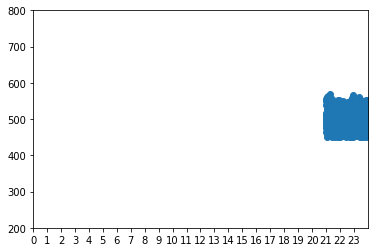

In [459]:
import matplotlib.pyplot as plt

plt.scatter(d['Start_time'].map(lambda x: x.hour + (x.minute/60)), d['Duration'])
plt.xlim(0, 24)
plt.xticks(range(24))
plt.ylim(200, 800)
plt.show()

d.to_csv('export.csv')

# Grouping and Plotting
Grouping Data by week and Computing weekly Mean and Standard Deviation and plotting

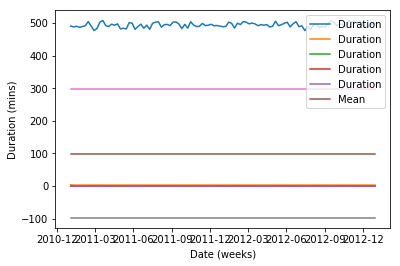

(733, 7)


In [361]:
# Grouping by freq=W. W=week, M=month 
wk = d.groupby(pd.Grouper(key='Start_time', freq='W')).mean()

# Computing mean and std
wk_mean = wk.values.mean()
wk_std = wk.values.std()

# Generate series for plot
wm = pd.Series(wk_mean, index=wk.index)
wm_p_std = pd.Series(wk_mean+wk_std, index=wk.index)
wm_m_std = pd.Series(wk_mean-wk_std, index=wk.index)

# plot
fig, ax = plt.subplots()
ax.plot(wk.index, wk.values, label='Duration')
ax.plot(wm.index, wm.values, label='Mean')
ax.plot(wm_p_std.index, wm_p_std.values)
ax.plot(wm_m_std.index, wm_m_std.values)



legend = ax.legend(loc='best')

plt.ylabel('Duration (mins)')
plt.xlabel('Date (weeks)')

plt.show()

print(d.shape)


In [289]:
def hour_range(x):
    val = -1
    if x >= 20 & x<22:
        val = 0
    elif x >= 22 & x<24:
        val = 1
    elif x >=0 & x<2:
        val = 2
    elif x>=2 & x<4:
        val = 3
    elif x>=4 & x<6:
        val = 4
    
    return val
    
def min_range(x):
    val = 0
    if x > 30:
        val = 1
    return val

# More features
d['Day_group'] = d['Start_time'].map(lambda x: x.dayofweek)
d['Weekend_group'] = d['Start_time'].map(lambda x: 1 if x.dayofweek>4 else 0)
d['Hour_group'] = d['Start_time'].map(lambda x: hour_range(x.hour))
d['Minute_group'] = d['Start_time'].map(lambda x: min_range(x.minute))
d.head(5)

,Start_time,End_time,Duration,Day_group,Weekend_group,Hour_group,Minute_group
0,2010-12-29 21:27:00,2010-12-30 05:24:00,477,2,0,0,0
1,2010-12-30 21:33:00,2010-12-31 05:15:00,462,3,0,0,1
2,2010-12-31 21:15:00,2011-01-01 05:38:00,503,4,0,0,0
3,2011-01-01 21:28:00,2011-01-02 05:56:00,508,5,1,0,0
4,2011-01-02 21:46:00,2011-01-03 06:10:00,504,6,1,0,1


In [296]:
def daily_a(x, start=21):
    sleep = random.randint(min_sleep, max_sleep*1.2)
    rand_min = random.randint(0, 59)
    st_hour = datetime.time(start, rand_min)
    start_time = datetime.datetime.combine(x, st_hour)
    if(x.dayofweek >= 5):
        sleep += random.randint(min_extra, max_extra)
    
    end_time = start_time + datetime.timedelta(minutes=sleep)
    
    return start_time, end_time, sleep



dates = pd.date_range('2012-12-31', '2013-12-30')
start_time, end_time, duration = [], [], []

for x in dates:
    start=21
    rnd = random.randint(0, 9)
    if rnd > 4:
        start, end, dur = daily_a(x, start)
    else:
        start, end, dur = daily(x, start)
    
    start_time.append(start)
    end_time.append(end)
    duration.append(dur)

    
dlist = list(zip(start_time, end_time, duration))
columns = ['Start_time', 'End_time', 'Duration']
d2 = pd.DataFrame(dlist, columns=columns)

d2.head(5)

,Start_time,End_time,Duration
0,2012-12-31 21:03:00,2013-01-01 05:25:00,502
1,2013-01-01 21:36:00,2013-01-02 06:50:00,554
2,2013-01-02 21:56:00,2013-01-03 06:04:00,488
3,2013-01-03 21:30:00,2013-01-04 05:46:00,496
4,2013-01-04 21:17:00,2013-01-05 05:40:00,503


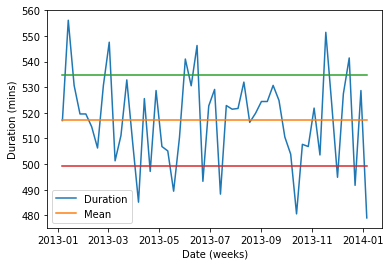

In [297]:
# Grouping by freq=W. W=week, M=month 
wk2 = d2.groupby(pd.Grouper(key='Start_time', freq='W')).mean()

# Computing mean and std
wk2_mean = wk2.values.mean()
wk2_std = wk2.values.std()

# Generate series for plot
wm2 = pd.Series(wk2_mean, index=wk2.index)
wm2_p_std = pd.Series(wk2_mean+wk2_std, index=wk2.index)
wm2_m_std = pd.Series(wk2_mean-wk2_std, index=wk2.index)

# plot
fig, ax = plt.subplots()
ax.plot(wk2.index, wk2.values, label='Duration')
ax.plot(wm2.index, wm2.values, label='Mean')
ax.plot(wm2_p_std.index, wm2_p_std.values)
ax.plot(wm2_m_std.index, wm2_m_std.values)



legend = ax.legend(loc='best')

plt.ylabel('Duration (mins)')
plt.xlabel('Date (weeks)')

plt.show()


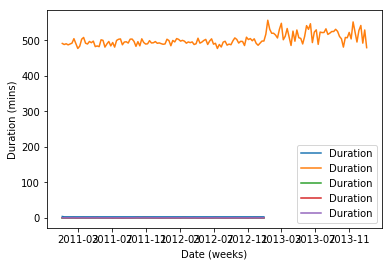

In [316]:
# concat the dataframes
cd = pd.concat([d, d2])
# Grouping by freq=W. W=week, M=month 
cwk = cd.groupby(pd.Grouper(key='Start_time', freq='W')).mean()
# plot
fig, ax = plt.subplots()
ax.plot(cwk.index, cwk.values, label='Duration')

legend = ax.legend(loc='best')

plt.ylabel('Duration (mins)')
plt.xlabel('Date (weeks)')

plt.show()


In [342]:
# Recomputing Features for cd
cd['Day_group'] = cd['Start_time'].map(lambda x: x.dayofweek)
cd['Weekend_group'] = cd['Start_time'].map(lambda x: 1 if x.dayofweek>4 else 0)
cd['Hour_group'] = cd['Start_time'].map(lambda x: hour_range(x.hour))
cd['Minute_group'] = cd['Start_time'].map(lambda x: min_range(x.minute))
cd.tail(10)


,Day_group,Duration,End_time,Hour_group,Minute_group,Start_time,Weekend_group
355,5,507,2013-12-22 05:54:00,0,0,2013-12-21 21:27:00,1
356,6,544,2013-12-23 06:27:00,0,0,2013-12-22 21:23:00,1
357,0,599,2013-12-24 07:44:00,0,1,2013-12-23 21:45:00,0
358,1,503,2013-12-25 06:15:00,0,1,2013-12-24 21:52:00,0
359,2,536,2013-12-26 06:50:00,0,1,2013-12-25 21:54:00,0
360,3,523,2013-12-27 05:55:00,0,0,2013-12-26 21:12:00,0
361,4,461,2013-12-28 04:46:00,0,0,2013-12-27 21:05:00,0
362,5,548,2013-12-29 06:11:00,0,0,2013-12-28 21:03:00,1
363,6,531,2013-12-30 05:54:00,0,0,2013-12-29 21:03:00,1
364,0,479,2013-12-31 05:22:00,0,0,2013-12-30 21:23:00,0


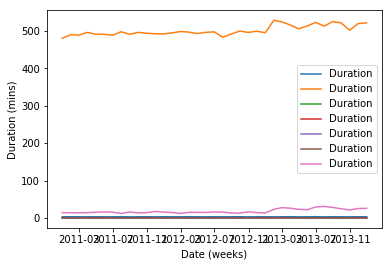

In [445]:
mad = lambda x: np.fabs(x - x.mean()).mean()
sdd = cd['Duration'].rolling(2).apply(mad)
cd['MAD'] = sdd
cd.head(10)
# Grouping by freq=W. W=week, M=month 
cwk = cd.groupby(pd.Grouper(key='Start_time', freq='M')).mean()
# plot
fig, ax = plt.subplots()
ax.plot(cwk.index, cwk.values, label='Duration')

legend = ax.legend(loc='best')

plt.ylabel('Duration (mins)')
plt.xlabel('Date (weeks)')

plt.show()

In [446]:
dataset = cd[['Day_group', 'Hour_group', 'Weekend_group', 'MAD']].values
dataset = np.nan_to_num(dataset)
dataset.shape

(1098, 4)

In [447]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

axx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X_train = dataset[:600, :]
X_test = dataset[600:733, :]
X_outliers = dataset[733:, :]

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


print(X_train.shape[0])
print(X_test.shape[0])
print(X_outliers.shape[0])
print(n_error_train)
print(n_error_test)
print(n_error_outliers)

600
133
365
104
28
212
